In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_df = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_df = pd.read_csv(clinical_trial_data_to_load)


# Combine the data into a single dataset
complete_df = pd.merge(clinical_trial_df,mouse_drug_df,on='Mouse ID',how='left')

# Display the data table for preview
complete_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
grouped_df = complete_df.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)']
avg_tumor_df = grouped_df.mean()

# Convert to DataFrame
avg_tumor_df = avg_tumor_df.reset_index()

# Preview DataFrame
avg_tumor_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_standard_errors = grouped_df.sem()

# Convert to DataFrame
tumor_standard_errors_df = pd.DataFrame(tumor_standard_errors)

# Preview DataFrame
tumor_standard_errors_df.reset_index(inplace=True)
tumor_standard_errors_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
pivot_avg_tumor_df = avg_tumor_df.pivot(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')

# Preview that Reformatting worked
pivot_avg_tumor_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


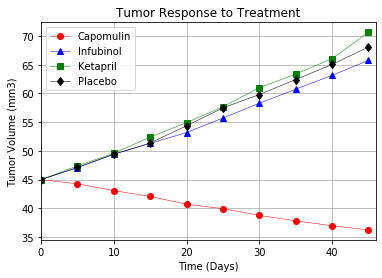

In [5]:
# Generate the Plot (with Error Bars)

plt.errorbar(pivot_avg_tumor_df.index, pivot_avg_tumor_df['Capomulin'], label='Capomulin',
             color='r', marker='o', linewidth=0.5)

plt.errorbar(pivot_avg_tumor_df.index, pivot_avg_tumor_df['Infubinol'], label='Infubinol',
             color='b', marker='^', linewidth=0.5)

plt.errorbar(pivot_avg_tumor_df.index, pivot_avg_tumor_df['Ketapril'], label='Ketapril',
             color='g', marker='s', linewidth=0.5)

plt.errorbar(pivot_avg_tumor_df.index, pivot_avg_tumor_df['Placebo'], label='Placebo',
             color='black', marker='d', linewidth=0.5)

plt.legend(loc='best')
plt.title('Tumor Response to Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid()
plt.xlim(0, pivot_avg_tumor_df.index.max() + 1) 

# Save the Figure
plt.savefig("Output/tumor_response_to_treatment.png")
plt.show()

## Metastatic Response to Treatment

In [6]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
grouped_met_df = complete_df.groupby(['Drug','Timepoint'])["Metastatic Sites"]
avg_met_df = grouped_met_df.mean()

#print(grouped_met_df)
grouped_met_df.head(5)

# Convert to DataFrame
avg_met_df = avg_met_df.reset_index()

# Preview DataFrame
avg_met_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [7]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_standard_errors = grouped_met_df.sem()

# Convert to DataFrame
met_standard_errors_df = pd.DataFrame(met_standard_errors)

# Preview DataFrame
met_standard_errors_df.reset_index(inplace=True)
met_standard_errors_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [8]:
# Minor Data Munging to Re-Format the Data Frames
pivot_avg_met_df = avg_met_df.pivot(index='Timepoint',columns='Drug',values='Metastatic Sites')

# Preview that Reformatting worked
pivot_avg_met_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


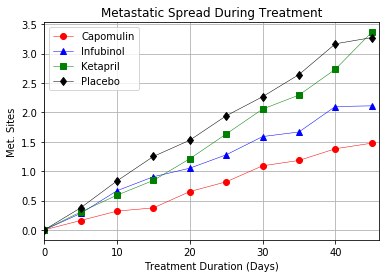

In [9]:
# Generate the Plot (with Error Bars)

plt.errorbar(pivot_avg_met_df.index, pivot_avg_met_df['Capomulin'], label='Capomulin',
             color='r', marker='o', linewidth=0.5)

plt.errorbar(pivot_avg_met_df.index, pivot_avg_met_df['Infubinol'], label='Infubinol',
             color='b', marker='^', linewidth=0.5)

plt.errorbar(pivot_avg_met_df.index, pivot_avg_met_df['Ketapril'], label='Ketapril',
             color='g', marker='s', linewidth=0.5)

plt.errorbar(pivot_avg_met_df.index, pivot_avg_met_df['Placebo'], label='Placebo',
             color='black', marker='d', linewidth=0.5)  
        
# Show the Figure
plt.legend(loc='best')
plt.title('Metastatic Spread During Treatment')
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Met. Sites')
plt.xlim(0, pivot_avg_met_df.index.max() + 1) 
plt.grid()

# Save the Figure
plt.savefig("Output/metastic_spread_during_treatment.png")
plt.show()

## Survival Rates

In [10]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_grouped_df = complete_df.groupby(['Drug','Timepoint'])['Mouse ID']
count_mouse_df = mouse_grouped_df.nunique()
count_mouse_df = pd.DataFrame(count_mouse_df)

# Convert to DataFrame
count_mouse_df.reset_index(inplace=True)
count_mouse_df=count_mouse_df.rename(columns={'Mouse ID':'Mouse Count'})

# Preview DataFrame
count_mouse_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [11]:
# Minor Data Munging to Re-Format the Data Frames
pivot_count_mouse_df = count_mouse_df.pivot(index='Timepoint',columns='Drug',values='Mouse Count')

# Preview the Data Frame
pivot_count_mouse_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17


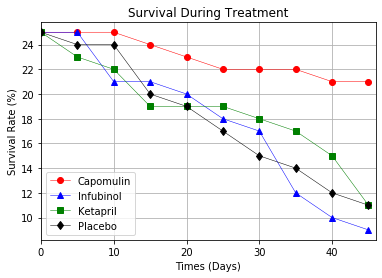

In [12]:
# Generate the Plot (Accounting for percentages)
plt.errorbar(pivot_count_mouse_df.index, pivot_count_mouse_df['Capomulin'], label='Capomulin',
             color='r', marker='o', linewidth=0.5)

plt.errorbar(pivot_count_mouse_df.index, pivot_count_mouse_df['Infubinol'], label='Infubinol',
             color='b', marker='^', linewidth=0.5)

plt.errorbar(pivot_count_mouse_df.index, pivot_count_mouse_df['Ketapril'], label='Ketapril',
             color='g', marker='s', linewidth=0.5)

plt.errorbar(pivot_count_mouse_df.index, pivot_count_mouse_df['Placebo'], label='Placebo',
             color='black', marker='d', linewidth=0.5)         
    
    
# Show the Figure
plt.legend(loc='best')
plt.title('Survival During Treatment')
plt.xlabel('Times (Days)')
plt.ylabel('Survival Rate (%)')
plt.xlim(0, pivot_count_mouse_df.index.max() + 1) 
plt.grid()

# Save the Figure
plt.savefig("Output/survival_during_treatment.png")

## Summary Bar Graph

In [13]:
# Calculate the percent changes for each drug
percentage_change = (pivot_avg_tumor_df.iloc[-1]/(pivot_avg_tumor_df.iloc[0])-1)*100

# Display the data to confirm
percentage_change


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

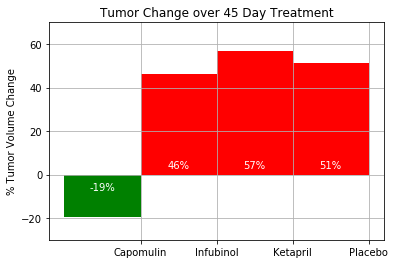

In [14]:
# Splice the data between passing and failing drugs
passing = percentage_change < 0

# Orient widths. Add labels, tick marks, etc. 
drug_list = ['Capomulin','Infubinol','Ketapril','Placebo']
change_list = [(percentage_change[durg])for durg in drug_list]
change_plt = plt.bar(drug_list,change_list,width=-1,align='edge',color=passing.map({True:'g',False:'r'}))
plt.grid()
plt.ylim(-30,70)
plt.ylabel('% Tumor Volume Change')
plt.title('Tumor Change over 45 Day Treatment')

# Use functions to label the percentages of changes
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        if height > 0:
            label_position = 2
        else:
            label_position = -8
        plt.text(rect.get_x() + rect.get_width()/2., label_position,
                '%d' % int(height)+'%',color='white',
                ha='center', va='bottom')
                
# Call functions to implement the function calls
autolabel(change_plt)

# Save the Figure
plt.savefig("Output/tumor_change_over_45day_treatment.png")